In [39]:
import pandas as pd
import numpy as np

In [40]:
# 데이터 불러오기
companyUrl = 'https://raw.githubusercontent.com/ghltorrhdiddl2/ml-project-3/main/EDA%26Preprocessing/230102_company3.csv'
company = pd.read_csv(companyUrl)
company

,Unnamed: 0,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,추천
0,0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,1.0
1,1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,0.0
2,2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,1.0
3,4,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3,1.0
4,5,(주)세종분석연구원,중소기업,3.0,3,6.0,33.33,0.00,0.00,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
169,180,(주)유니텍,기타,4.0,36,33.0,8.82,23.53,266.78,2.2,0.0
170,181,(주)우리기술,기타,4.0,115,27.0,8.77,5.26,59.98,2.2,0.0
171,182,한국쓰리엠(주),기타,4.0,1686,45.0,7.25,8.00,110.34,3.7,1.0
172,183,에스지에이(주),기타,4.0,193,25.0,80.61,70.92,87.98,2.5,0.0


In [41]:
# 필요 없는 컬럼 제거 
company.drop(['Unnamed: 0'], axis=1, inplace=True)
company

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,추천
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,1.0
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,0.0
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,1.0
3,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3,1.0
4,(주)세종분석연구원,중소기업,3.0,3,6.0,33.33,0.00,0.00,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...
169,(주)유니텍,기타,4.0,36,33.0,8.82,23.53,266.78,2.2,0.0
170,(주)우리기술,기타,4.0,115,27.0,8.77,5.26,59.98,2.2,0.0
171,한국쓰리엠(주),기타,4.0,1686,45.0,7.25,8.00,110.34,3.7,1.0
172,에스지에이(주),기타,4.0,193,25.0,80.61,70.92,87.98,2.5,0.0


In [42]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     174 non-null    object 
 1   기업구분    174 non-null    object 
 2   기업구분코드  174 non-null    float64
 3   사원수     174 non-null    int64  
 4   업력      174 non-null    float64
 5   입사율(%)  174 non-null    float64
 6   퇴사율(%)  174 non-null    float64
 7   이직율(%)  174 non-null    float64
 8   별점      174 non-null    float64
 9   추천      174 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.7+ KB


In [43]:
company.columns

Index(['기업명', '기업구분', '기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)',
       '별점', '추천'],
      dtype='object')

In [44]:
# 데이터 나누기

from sklearn.model_selection import train_test_split

X = company[['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)']] # 특성(feature)
y = company['추천'] # 정답(label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [45]:
# # 데이터 나누기

# from sklearn.model_selection import train_test_split

# X = company.drop(['별점', '추천'], axis=1)
# y = company['추천']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, f1_score

In [48]:
# solver : 최적합 알고리즘 선택
lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [49]:
y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.6402877697841727
Test Acc :  0.45714285714285713


In [50]:
# 스케일러까지 적용해서 Pipeline 만들기

estimators = [
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe = Pipeline(estimators)

In [51]:
pipe.fit(X_train, y_train) # fit

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [52]:
pred = pipe.predict(X_test)

In [53]:
# 결과 확인
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.6474820143884892
Test Acc :  0.42857142857142855


In [54]:
# 수치 확인
print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('AUC score : ', roc_auc_score(y_test, pred))
print('F1 score : ', f1_score(y_test, pred))

Accuracy :  0.42857142857142855
Recall :  1.0
Precision :  0.4117647058823529
AUC score :  0.5238095238095238
F1 score :  0.5833333333333334


In [55]:
from sklearn.tree import DecisionTreeClassifier

company_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
company_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [56]:
y_pred_tr = company_tree.predict(X_train)
y_pred_test = company_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.697841726618705
Test Acc :  0.42857142857142855


In [57]:
models = {
    'logistic regression' : pipe,
    'decision tree' : company_tree
}

In [58]:
from sklearn.metrics import roc_curve

In [59]:
for model_name, model in models.items():
    print(model_name)
    print(model)

logistic regression
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])
decision tree
DecisionTreeClassifier(max_depth=2, random_state=13)


In [61]:
# 한글 설정
import platform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system. sorry~~~")
    
plt.rcParams["axes.unicode_minus"] = False

Hangul OK in your Windows!!!


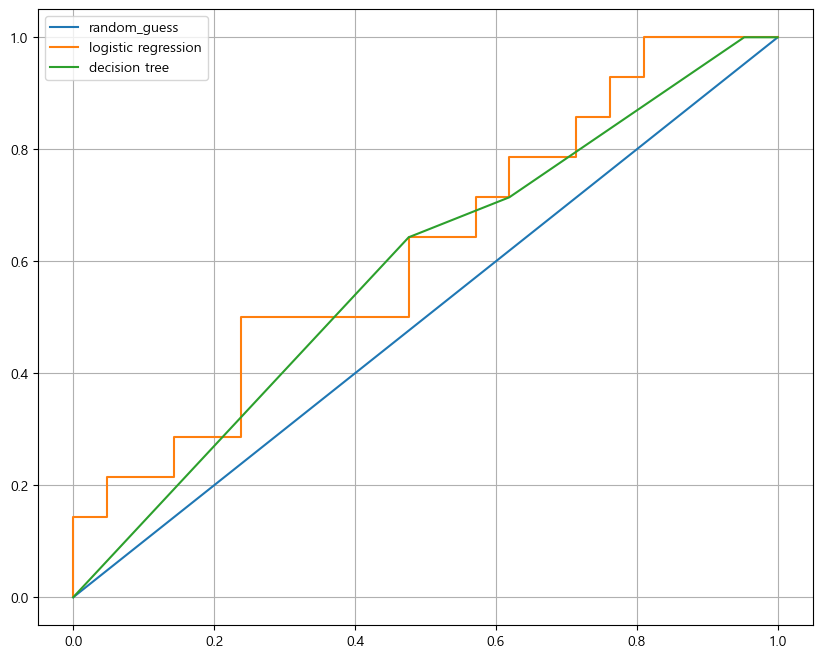

In [62]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], label='random_guess')

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    plt.plot(fpr, tpr, label=model_name)

plt.grid()
plt.legend()
plt.show()

In [63]:
coef = list(pipe['clf'].coef_[0])
labels = list(X_train.columns)

In [64]:
labels

['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)']

In [65]:
# 중요한 feature에 대해 그려보기

features = pd.DataFrame({'Features':labels, 'importance':coef})
features

,Features,importance
0,기업구분코드,-0.138643
1,사원수,-0.070020
2,업력,-0.056601
3,입사율(%),0.277636
4,퇴사율(%),-0.571052
5,이직율(%),-0.139551


In [66]:
features.sort_values(by=['importance'], ascending=True, inplace=True)
features

,Features,importance
4,퇴사율(%),-0.571052
5,이직율(%),-0.139551
0,기업구분코드,-0.138643
1,사원수,-0.070020
2,업력,-0.056601
3,입사율(%),0.277636


In [67]:
features['positive'] = features['importance'] > 0
features

,Features,importance,positive
4,퇴사율(%),-0.571052,False
5,이직율(%),-0.139551,False
0,기업구분코드,-0.138643,False
1,사원수,-0.070020,False
2,업력,-0.056601,False
3,입사율(%),0.277636,True


In [68]:
features.set_index('Features', inplace=True)
features

,importance,positive
Features,,
퇴사율(%),-0.571052,False
이직율(%),-0.139551,False
기업구분코드,-0.138643,False
사원수,-0.070020,False
업력,-0.056601,False
입사율(%),0.277636,True


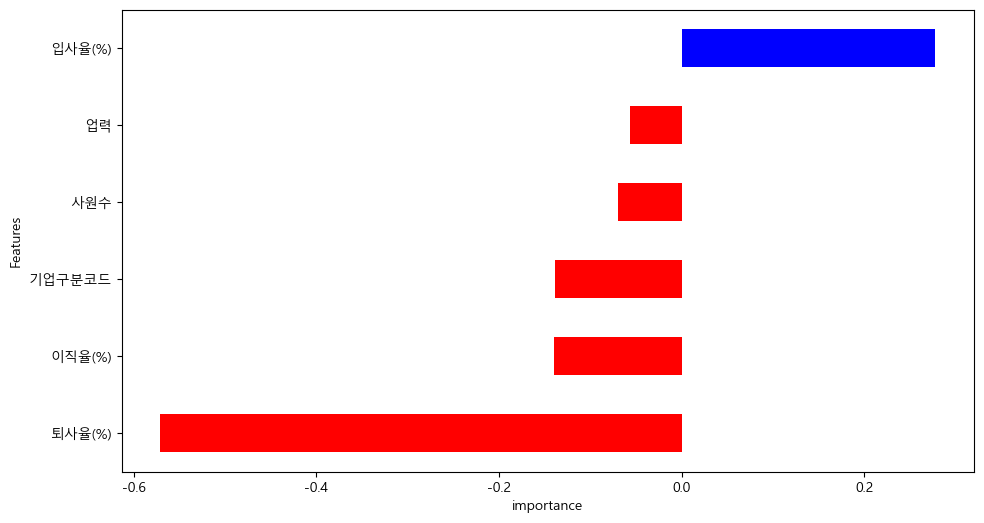

In [69]:
import matplotlib.pyplot as plt

features['importance'].plot(kind='barh',
                            figsize=(11, 6),
                            color=features['positive'].map({True:'blue', False:'red'})
)
plt.xlabel('importance')
plt.show()

In [70]:
# '기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)'
시소디자인 = np.array([[3.0, 21, 12, 13, 27, 207.69]]) 
디프로젝트 = np.array([[3.0, 11, 8, 50, 67, 134]]) 
삼환기업 = np.array([[1.0, 189, 78, 44, 21, 47.72]])  

In [71]:
print('시소디자인  : ', company_tree.predict_proba(시소디자인)[0, 1])
print('디프로젝트  : ', company_tree.predict_proba(디프로젝트)[0, 1])
print('삼환기업  : ', company_tree.predict_proba(삼환기업)[0, 1])

시소디자인  :  0.5510204081632653
디프로젝트  :  0.5789473684210527
삼환기업  :  0.8214285714285714


c:\Users\rcopi\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\rcopi\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\rcopi\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [72]:
print('시소디자인  : ', lr.predict_proba(시소디자인 )[0, 1])
print('디프로젝트  : ', lr.predict_proba(디프로젝트)[0, 1])
print('삼환기업  : ', lr.predict_proba(삼환기업)[0, 1])

시소디자인  :  0.606352717744363
디프로젝트  :  0.5055494450369465
삼환기업  :  0.702769387069036


c:\Users\rcopi\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rcopi\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rcopi\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
